# Air Quality Index (AQI) (Continued)

In [3]:
#From 07/26/24

In [80]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
#Load Dataset
data = pd.read_csv('AQI.csv')
data.head(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0
5,Alabama,Jefferson,2023,182,72,98,8,3,1,0,230,91,54,1,0,63,118,0
6,Alabama,Madison,2023,181,129,50,2,0,0,0,115,68,43,0,0,86,95,0
7,Alabama,Mobile,2023,178,133,45,0,0,0,0,90,59,43,0,0,68,110,0
8,Alabama,Montgomery,2023,150,97,53,0,0,0,0,93,71,47,0,0,66,84,0
9,Alabama,Morgan,2023,181,138,41,2,0,0,0,140,64,41,0,0,95,86,0


In [9]:
#Check for Missing Values
print(data.isnull().sum())

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64


In [11]:
#Feature Engineering
data['Total Pollutant Days'] = data['Days CO'] + data['Days NO2'] + data['Days Ozone'] + data['Days PM2.5'] + data['Days PM10']

In [13]:
#Data Normalization
scaler = StandardScaler()

features = ['Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 
'Hazardous Days', 'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10',
'Total Pollutant Days']

data[features] = scaler.fit_transform(data[features])

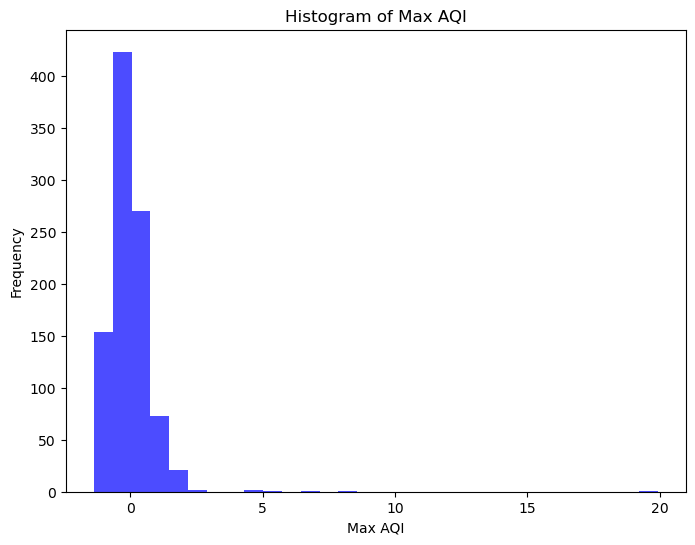

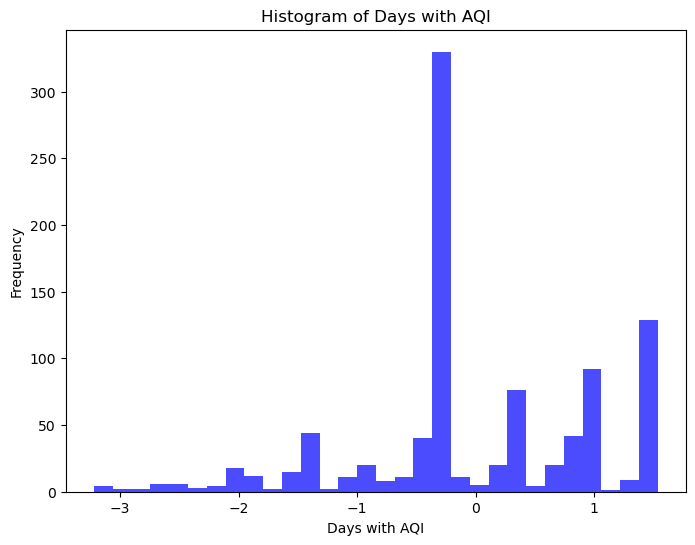

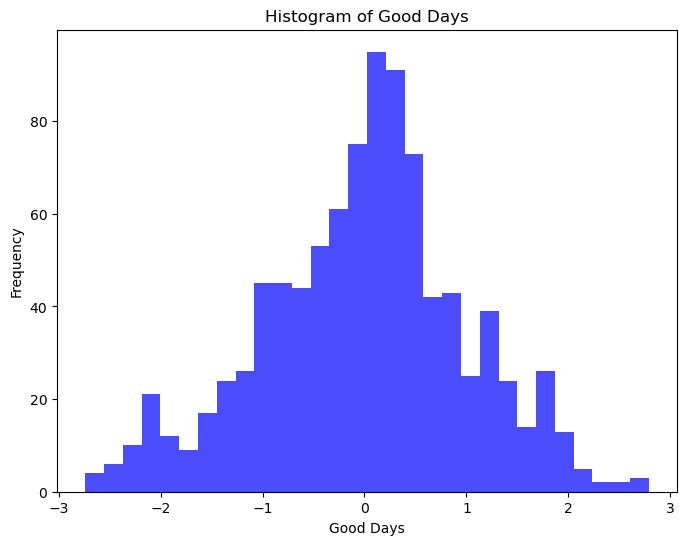

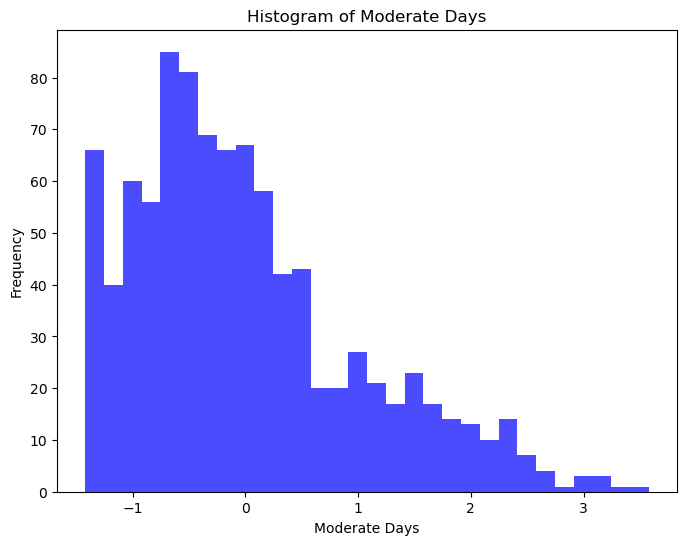

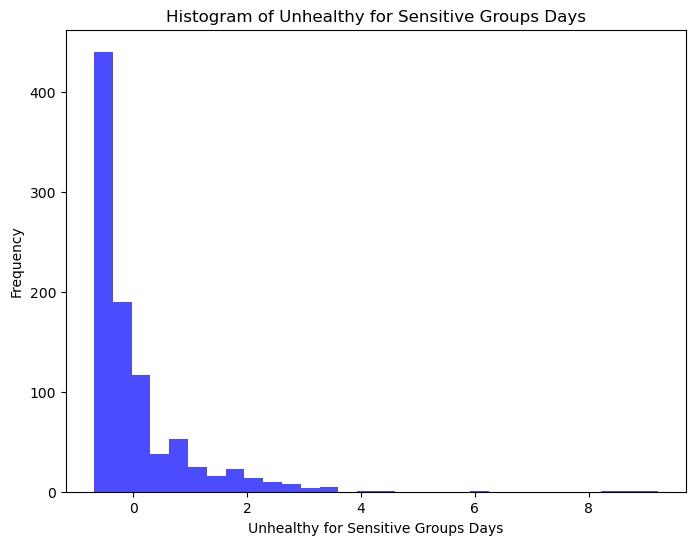

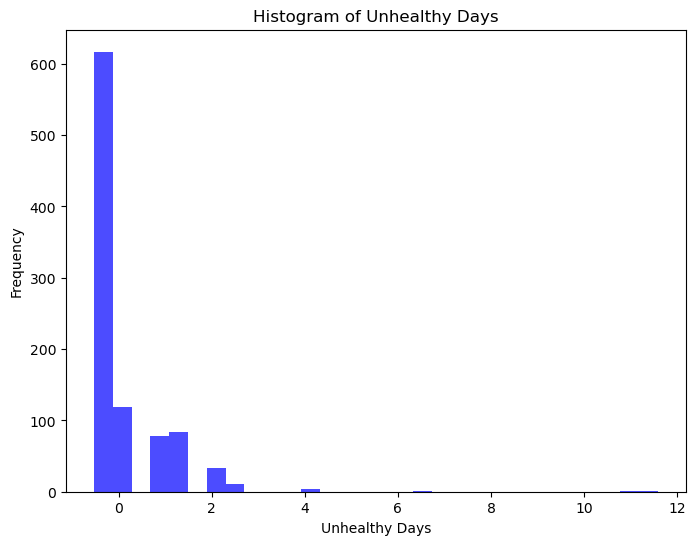

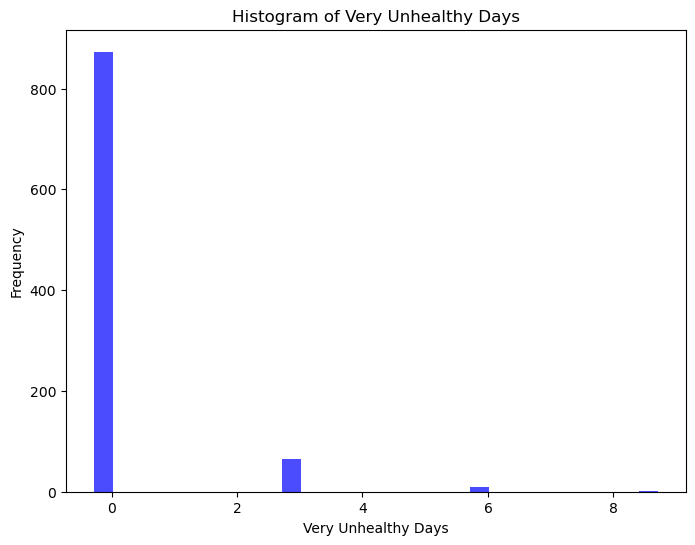

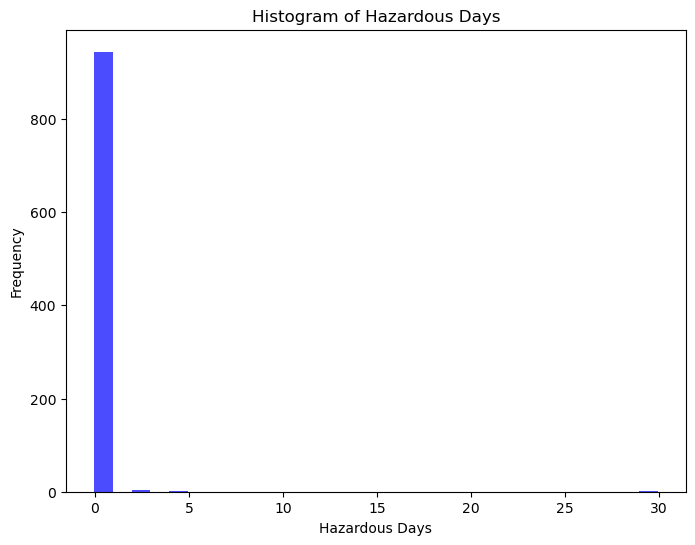

In [15]:
#Columns to consider for histograms
columns = ['Max AQI', 'Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 
           'Very Unhealthy Days', 'Hazardous Days']

#Creating histograms
for column in columns:
    plt.figure(figsize = (8, 6))
    plt.hist(data[column], bins = 30, alpha = 0.7, color = 'blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


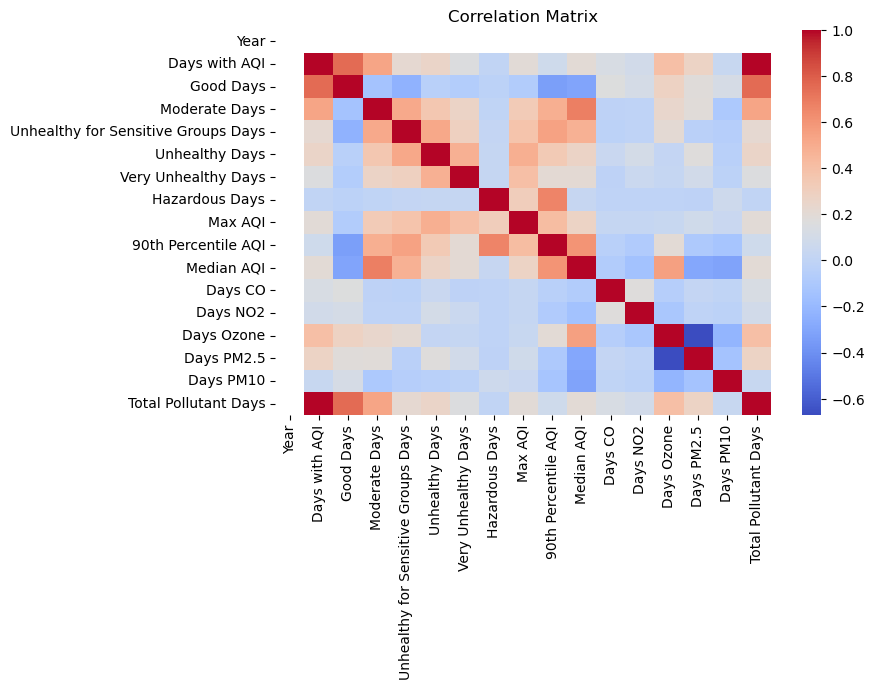

In [17]:
#Compute the Correlation Matrix
numeric_data = data.select_dtypes(include = ['float64', 'int64'])
corr_matrix = numeric_data.corr()

#Heatmap of Correlations
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
############################################################################################################################################

In [ ]:
#From 07/30/24

## Data Modeling

In [22]:
#Drop Non-Numeric Columns
x = data.drop(columns = ['Max AQI', 'State', 'County'])
y = pd.to_numeric(data['Max AQI'], errors = 'coerce')

#Drop NAN Values
x = x.dropna()
y = y[x.index]

#Split the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Train and Evaluate

In [25]:
#Initialize
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

#Make Predictions
lr_predict = lr_model.predict(x_test)

#Evaluate
print('Linear Regression Model: ')
print(f'MAE : {mean_absolute_error(y_test, lr_predict)}')
print(f'MSE : {mean_squared_error(y_test, lr_predict)}')
print(f'R2 : {r2_score(y_test, lr_predict)}')

Linear Regression Model: 
MAE : 0.41880585636625905
MSE : 2.3538983942106975
R2 : 0.09401647384321532


In [27]:
#Initialize
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

#Make Predictions
rfr_predict = rfr_model.predict(x_test)

#Evaluate
print('Random Forest Regressor Model: ')
print(f'MAE : {mean_absolute_error(y_test, rfr_predict)}')
print(f'MSE : {mean_squared_error(y_test, rfr_predict)}')
print(f'R2 : {r2_score(y_test, rfr_predict)}')

Random Forest Regressor Model: 
MAE : 0.21942619569481525
MSE : 1.2516831774378452
R2 : 0.5182441427738351


In [29]:
#Initialize
svr_model = SVR(kernel = 'rbf')
svr_model.fit(x_train, y_train)

#Make Predictions
svr_predict = svr_model.predict(x_test)

#Evaluate
print('Suppor Vector Regression Model: ')
print(f'MAE : {mean_absolute_error(y_test, svr_predict)}')
print(f'MSE : {mean_squared_error(y_test, svr_predict)}')
print(f'R2 : {r2_score(y_test, svr_predict)}')

Suppor Vector Regression Model: 
MAE : 0.6316286509241181
MSE : 2.6398055319206293
R2 : -0.01602530086248266


In [ ]:
############################################################################################################################################

In [47]:
GradientBoostingRegressor(n_estimators = 100, random_state = 42)

#Initialize
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)

#Make Predictions
gbr_predict = gbr_model.predict(x_test)

#Evaluate
print('Gradient Boosting Regressor Model: ')
print(f'MAE : {mean_absolute_error(y_test, gbr_predict)}')
print(f'MSE : {mean_squared_error(y_test, gbr_predict)}')
print(f'R2 : {r2_score(y_test, gbr_predict)}')

Gradient Boosting Regressor Model: 
MAE : 0.21941974577912624
MSE : 1.3671721160687038
R2 : 0.4737940186264952


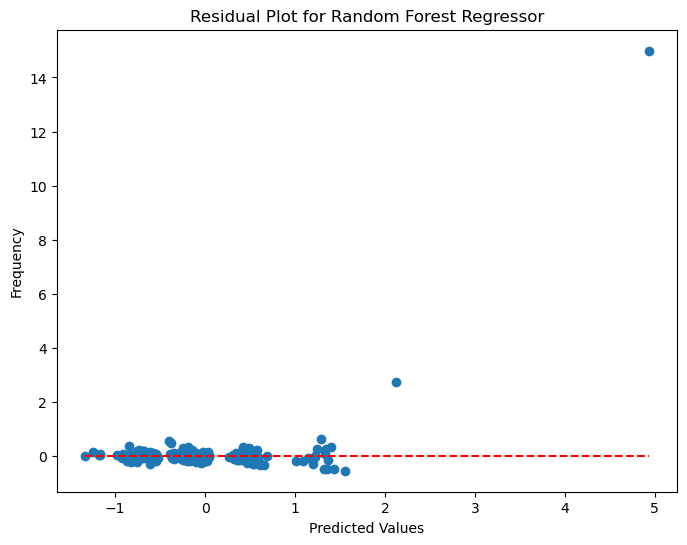

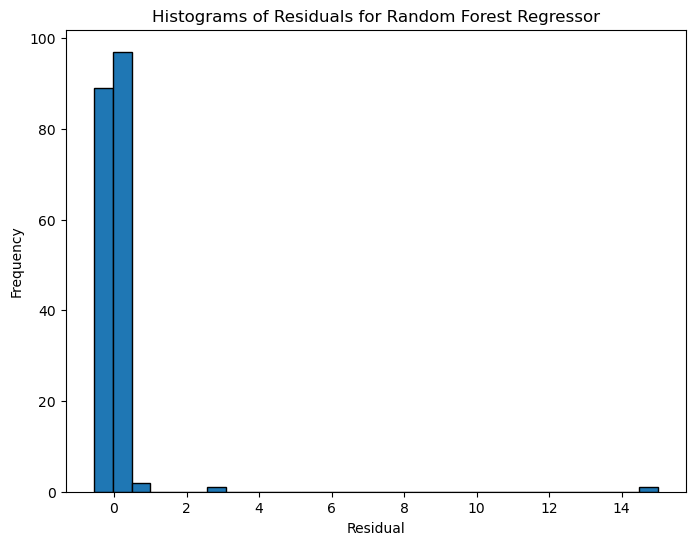

In [65]:
#Residuals for Random Forest
rfr_residuals = y_test - rfr_predict

plt.figure(figsize = (8, 6))
plt.scatter(rfr_predict, rfr_residuals)
plt.hlines(y = 0, xmin = rfr_predict.min(), xmax = rfr_predict.max(), colors = 'red', linestyles = 'dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()

plt.figure(figsize = (8, 6))
plt.hist(rfr_residuals, bins = 30, edgecolor = 'black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histograms of Residuals for Random Forest Regressor')
plt.show()

## Hyperparameter Tuning

In [74]:
#Define the Parameter Grid
parameter_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Initialize the GridSearchCV Object
grid_search_rfr = GridSearchCV(estimator = rfr_model, param_grid = parameter_grid_rfr, cv = 3, n_jobs = -1, verbose = 2)

#Fit the Grid Search to the Data
grid_search_rfr.fit(x_train, y_train)

#Get the Best Parameters and the Best Score
best_parameters_rfr = grid_search_rfr.best_params_
best_score_rfr = grid_search_rfr.best_score_

print(f'Best Parameters for Random Forest Regressor: {best_parameters_rfr}')
print(f'Best Cross-Validation Score for Random Forest Regressor: {best_score_rfr}')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; to

In [98]:
parameter_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gbr = GridSearchCV(estimator = gbr_model, param_grid = parameter_grid_gbr, cv = 3, n_jobs = -1, verbose = 2)
grid_search_gbr.fit(x_train, y_train)

best_parameters_gbr = grid_search_gbr.best_params_
best_score_gbr = grid_search_gbr.best_score_

print(f'Best Parameters for Gradient Boosting: {best_parameters_gbr}')
print(f'Best Cross-Validation Score for Gradient Boosting: {best_score_gbr}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score for Gradient Boosting: 0.8126509908590589


In [100]:
#Using the Best Parameters from Grid Search
rfr_model_tuned= RandomForestRegressor(**best_parameters_rfr)
rfr_model_tuned.fit(x_train, y_train)
rfr_predictions_tuned = rfr_model_tuned.predict(x_test)

gbr_model_tuned= GradientBoostingRegressor(**best_parameters_gbr)
gbr_model_tuned.fit(x_train, y_train)
gbr_predictions_tuned = gbr_model_tuned.predict(x_test)

#Evaluate the Tuned Models
print('Tuned Random Forest Regressor Performance:')
print(f'MAE : {mean_absolute_error(y_test, rfr_predictions_tuned)}')
print(f'MSE : {mean_squared_error(y_test, rfr_predictions_tuned)}')
print(f'R2 : {r2_score(y_test, rfr_predictions_tuned)}')

print('\nTuned Gradient Boosting Regressor Performance:')
print(f'MAE : {mean_absolute_error(y_test, gbr_predictions_tuned)}')
print(f'MSE : {mean_squared_error(y_test, gbr_predictions_tuned)}')
print(f'R2 : {r2_score(y_test, gbr_predictions_tuned)}')

Tuned Random Forest Regressor Performance:
MAE : 0.21622494294647518
MSE : 1.1983008513360256
R2 : 0.5387902751621854

Tuned Gradient Boosting Regressor Performance:
MAE : 0.21932882095878123
MSE : 1.3377630342271278
R2 : 0.48511317485405137
